# Tutorial 2.a: Representing and Evaluating Uncertainty for Classification

In [1]:
# We first must important the dependencies, and make sure that the torchuq package is in PYTHONPATH
# If you are running this notebook in the original directory as in the repo, then the following statement should work
import sys
sys.path.append('../..')   # Include the directory that contains the torchuq package
import torch  
from matplotlib import pyplot as plt

In [2]:
reader = torch.load('pretrained/resnet18-cifar10.pt')
predictions = torch.softmax(reader['prob'], dim=1)
labels = reader['labels']

In [3]:
from torchuq.evaluate import categorical
from torchuq.transform.calibrate import *
import numpy as np

Torchuq implements many recalibration algorithms. Below is a list of currently supported algorithms:

- Standard calibration: temperature scaling, histogram binning 
- Classwise calibration: dirichlet recalibration
- Decision calibration 

### Temperature Scaling 

In torchuq, all calibrator classes work essentially the same, so this might sound familiar if you have seen the tutorial for regression. 

In particular, To use ``TemperatureScaling`` there are only three functions that you need to know  

1. Constructor: ``calibrator = TemperatureScaling``. 

2. Train: ``TemperatureScaling.train(val_preds, val_labels)`` trains the predictor based on validation predictions and validation labels

3. Test: ``test_intervals = TemperatureScaling(test_preds)`` outputs the recalibrated predictions


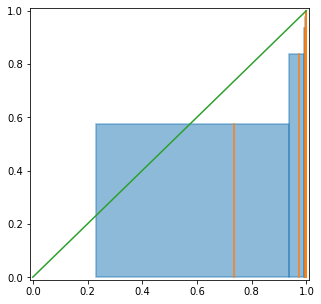

In [4]:
categorical.plot_reliability_diagram(predictions, labels);

In [5]:
calibrator = TemperatureScaling(verbose=True)
calibrator.train(predictions, labels)
predictions_ts = calibrator(predictions)

_change_device is deprecated 
Iteration 0, lr=0.00100, NLL=0.181
Iteration 100, lr=0.00100, NLL=0.172
Iteration 200, lr=0.00100, NLL=0.167
Iteration 300, lr=0.00100, NLL=0.164
Iteration 400, lr=0.00100, NLL=0.163
Iteration 500, lr=0.00100, NLL=0.162
Iteration 600, lr=0.00100, NLL=0.162
Iteration 700, lr=0.00100, NLL=0.162
Iteration 800, lr=0.00006, NLL=0.162
_change_device is deprecated 


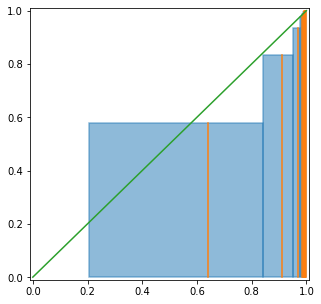

In [6]:
categorical.plot_reliability_diagram(predictions_ts, labels);

### Histogram Binning 

Similarly you can use histogram binning. It is extremely easy to use a different recalibrator, simply use the HistogramBinning class instead of TemperatureScaling. In this case, histogram binning appears to work better according to the visualized reliability diagram. 

Top-1 accuracy of predictor is 0.952
Number of histogram binning bins is 20
tensor([-1.0000,  0.8702,  0.9761,  0.9930,  0.9969,  0.9981,  0.9986,  0.9989,
         0.9991,  0.9992,  0.9993,  0.9993,  0.9994,  0.9995,  0.9995,  0.9996,
         0.9996,  0.9997,  0.9997,  0.9998,  2.0000])


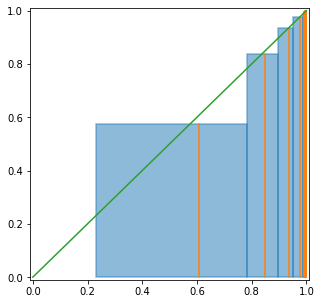

In [7]:
calibrator = HistogramBinning(verbose=True)
calibrator.train(predictions, labels)
predictions_hb = calibrator(predictions)
categorical.plot_reliability_diagram(predictions_hb, labels);

### Dirichlet Calibration 

While the previous methods can achieve confidence calibration, it may not be sufficient. In many applications we want classwise calibration. 

_change_device is deprecated 
Finished training 0 epochs, lr=0.00100, nll = 4.986, reg = 2.583
Finished training 10 epochs, lr=0.00100, nll = 0.572, reg = 1.560
Finished training 20 epochs, lr=0.00100, nll = 0.247, reg = 0.949
Finished training 30 epochs, lr=0.00100, nll = 0.190, reg = 0.497
Finished training 40 epochs, lr=0.00100, nll = 0.170, reg = 0.237
Finished training 50 epochs, lr=0.00100, nll = 0.161, reg = 0.122
Finished training 60 epochs, lr=0.00100, nll = 0.156, reg = 0.073
Finished training 70 epochs, lr=0.00100, nll = 0.153, reg = 0.058
Finished training 80 epochs, lr=0.00100, nll = 0.152, reg = 0.052
Finished training 90 epochs, lr=0.00050, nll = 0.151, reg = 0.049
Finished training 100 epochs, lr=0.00050, nll = 0.150, reg = 0.050
Finished training 110 epochs, lr=0.00025, nll = 0.150, reg = 0.048
Finished training 120 epochs, lr=0.00013, nll = 0.149, reg = 0.047
Finished training 130 epochs, lr=0.00006, nll = 0.149, reg = 0.048
Finished training 140 epochs, lr=0.00006, n

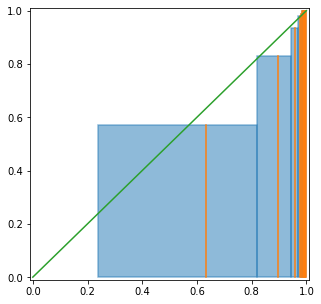

In [8]:
calibrator = DirichletCalibrator(verbose=True)
calibrator.train(predictions, labels)
predictions_dc = calibrator(predictions)
categorical.plot_reliability_diagram(predictions_dc, labels);

In [9]:
from torchuq.transform.decision import DecisionCalibrator
calibrator = DecisionCalibrator(verbose=True)
calibrator.train(predictions, labels)
predictions_dc = calibrator(predictions)
categorical.plot_reliability_diagram(predictions_dc, labels);

NameError: name 'CalibratorDecision' is not defined